In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [3]:
sales = pd.read_csv("sales.csv")
stores = pd.read_csv("stores.csv")
products = pd.read_csv("products.csv")

sales.head()


,date,store_id,product_id,sales,revenue
0,2023-01-01,S1,P1,120,2400
1,2023-01-02,S1,P1,130,2600
2,2023-01-03,S1,P1,110,2200
3,2023-01-04,S1,P1,150,3000
4,2023-01-05,S1,P1,170,3400


In [4]:
df = sales.merge(stores, on="store_id", how="left") \
          .merge(products, on="product_id", how="left")

df.head()


,date,store_id,product_id,sales,revenue,store_name,city,product_name,category
0,2023-01-01,S1,P1,120,2400,Central Store,Mumbai,Smartphone,Electronics
1,2023-01-02,S1,P1,130,2600,Central Store,Mumbai,Smartphone,Electronics
2,2023-01-03,S1,P1,110,2200,Central Store,Mumbai,Smartphone,Electronics
3,2023-01-04,S1,P1,150,3000,Central Store,Mumbai,Smartphone,Electronics
4,2023-01-05,S1,P1,170,3400,Central Store,Mumbai,Smartphone,Electronics


In [5]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          20 non-null     datetime64[ns]
 1   store_id      20 non-null     object        
 2   product_id    20 non-null     object        
 3   sales         20 non-null     int64         
 4   revenue       20 non-null     int64         
 5   store_name    20 non-null     object        
 6   city          20 non-null     object        
 7   product_name  20 non-null     object        
 8   category      20 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.5+ KB


In [8]:
df.to_csv("cleaned_sales.csv", index=False)


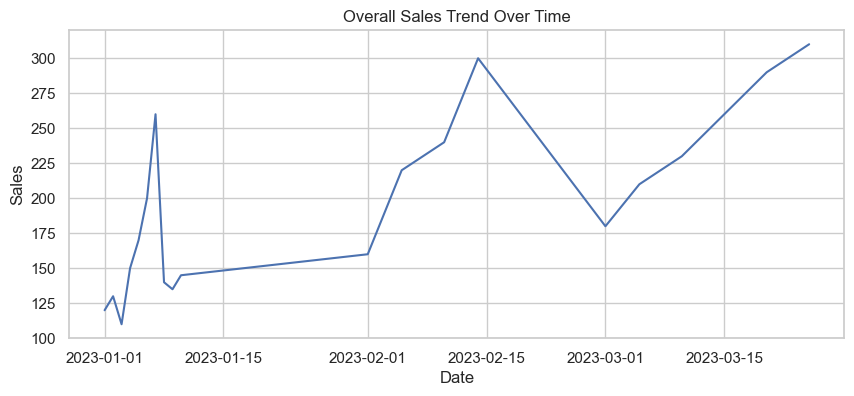

In [9]:
# TIME-SERIES PATTERN ANALYSIS
# Line Plot

plt.figure(figsize=(10,4))
plt.plot(df['date'], df['sales'])
plt.title("Overall Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


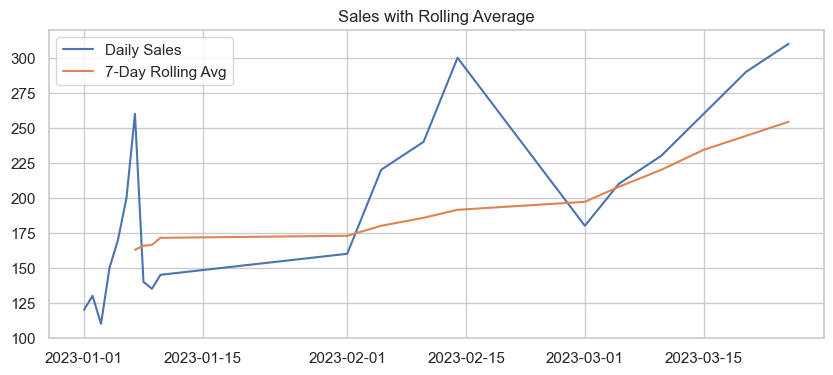

In [10]:
# Rolling

df['sales_rolling_7'] = df['sales'].rolling(window=7).mean()

plt.figure(figsize=(10,4))
plt.plot(df['date'], df['sales'], label="Daily Sales")
plt.plot(df['date'], df['sales_rolling_7'], label="7-Day Rolling Avg")
plt.legend()
plt.title("Sales with Rolling Average")
plt.show()


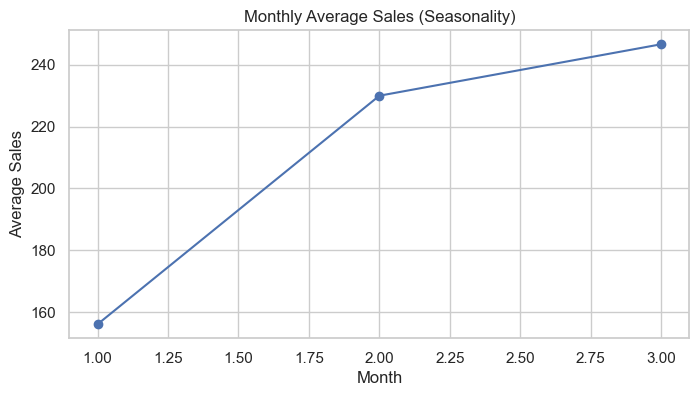

In [11]:
# Monthly Seasonality

df['month'] = df['date'].dt.month

monthly_sales = df.groupby('month')['sales'].mean()

monthly_sales.plot(kind='line', marker='o', figsize=(8,4))
plt.title("Monthly Average Sales (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()


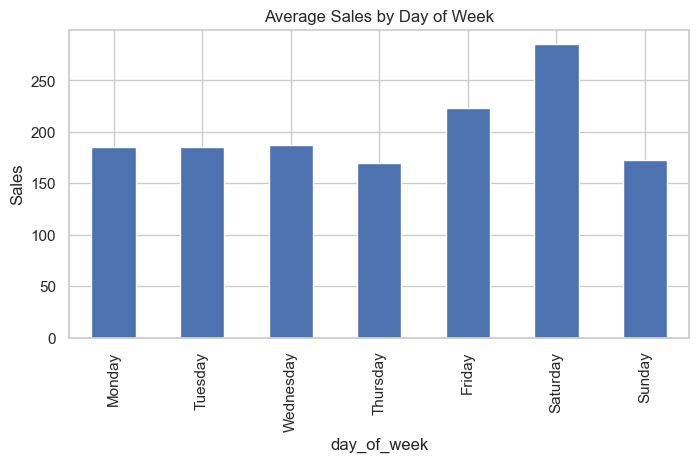

In [12]:
# Weekly Pattern Analysis

df['day_of_week'] = df['date'].dt.day_name()

weekly_sales = df.groupby('day_of_week')['sales'].mean()

weekly_sales = weekly_sales.reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])

weekly_sales.plot(kind='bar', figsize=(8,4))
plt.title("Average Sales by Day of Week")
plt.ylabel("Sales")
plt.show()


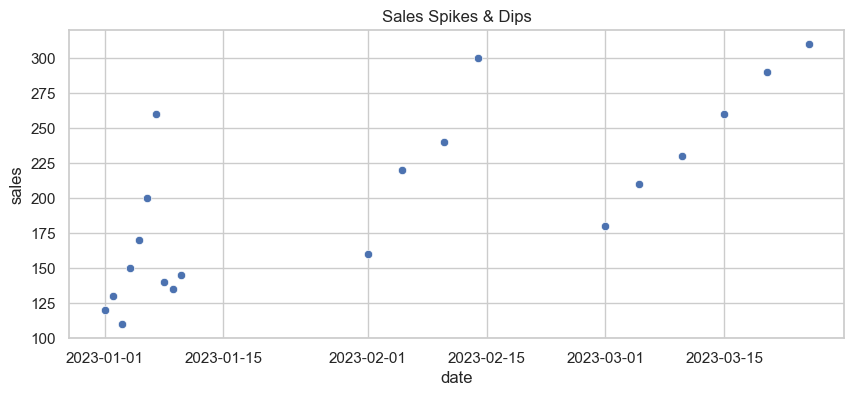

In [13]:
# Holiday

plt.figure(figsize=(10,4))
sns.scatterplot(x='date', y='sales', data=df)
plt.title("Sales Spikes & Dips")
plt.show()


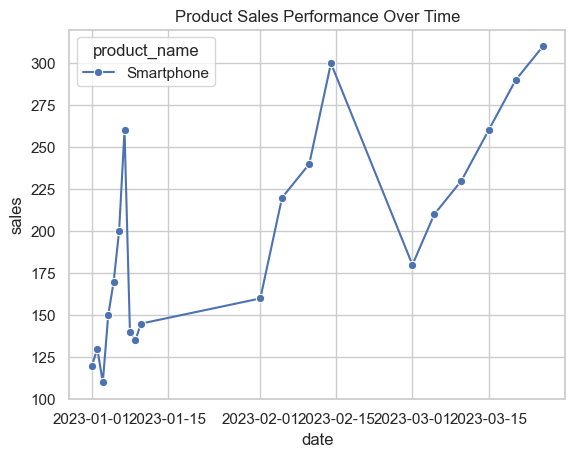

In [14]:
# Store & Product

sns.lineplot(
    x='date',
    y='sales',
    hue='product_name',
    data=df,
    marker="o"
)
plt.title("Product Sales Performance Over Time")
plt.show()
